# DSI - 16 Capstone Project -  Personality Prediction 

## **Part 3 - Binary Class Modelling**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-3---Binary-Class-Modelling" data-toc-modified-id="Part-3---Binary-Class-Modelling-1"><strong>Part 3 - Binary Class Modelling</strong></a></span></li><li><span><a href="#Notebook-Organization" data-toc-modified-id="Notebook-Organization-2">Notebook Organization</a></span></li><li><span><a href="#Reading-in-the-cleaned-data" data-toc-modified-id="Reading-in-the-cleaned-data-3">Reading in the cleaned data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4">Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-4.1">Encoding</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.2">Train Test Split</a></span></li><li><span><a href="#Term-Frequency-Inverse-Document-Frequency-(TF-IDF)-Vectorizer" data-toc-modified-id="Term-Frequency-Inverse-Document-Frequency-(TF-IDF)-Vectorizer-4.3">Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5">Modelling</a></span><ul class="toc-item"><li><span><a href="#User-Defined-Functions" data-toc-modified-id="User-Defined-Functions-5.1">User Defined Functions</a></span></li><li><span><a href="#Global-Parameters" data-toc-modified-id="Global-Parameters-5.2">Global Parameters</a></span></li><li><span><a href="#Introversion-VS-Extroversion-(Energy-Axis)" data-toc-modified-id="Introversion-VS-Extroversion-(Energy-Axis)-5.3">Introversion VS Extroversion (Energy Axis)</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.3.1">Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.3.2">XGBoost</a></span></li></ul></li><li><span><a href="#Intuition-VS-Sensing-(Information-Axis)" data-toc-modified-id="Intuition-VS-Sensing-(Information-Axis)-5.4">Intuition VS Sensing (Information Axis)</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.4.1">Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.4.2">XGBoost</a></span></li></ul></li><li><span><a href="#Thinking-VS-Feeling-(Decision-Making-Axis)" data-toc-modified-id="Thinking-VS-Feeling-(Decision-Making-Axis)-5.5">Thinking VS Feeling (Decision Making Axis)</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.5.1">Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.5.2">XGBoost</a></span></li></ul></li><li><span><a href="#Judging-VS-Perceiving-(Organization-Axis)" data-toc-modified-id="Judging-VS-Perceiving-(Organization-Axis)-5.6">Judging VS Perceiving (Organization Axis)</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.6.1">Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.6.2">XGBoost</a></span></li></ul></li><li><span><a href="#Summary-of-Performance" data-toc-modified-id="Summary-of-Performance-5.7">Summary of Performance</a></span></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-6">Prediction</a></span><ul class="toc-item"><li><span><a href="#Prediction-1:-ESTP" data-toc-modified-id="Prediction-1:-ESTP-6.1">Prediction 1: ESTP</a></span></li><li><span><a href="#Prediction-2:-INFJ" data-toc-modified-id="Prediction-2:-INFJ-6.2">Prediction 2: INFJ</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li></ul></div>

## Notebook Organization

This project is organized into 3 different notebooks with the following parts

- Part 1: [Loading in the dataset, EDA and data-preprocessing](Capstone_Personality_Prediction_EDA_SpaCy_.ipynb)
- Part 2: [Multi Class Modelling (16 Classes for the personality type) ](Capstone_Personality_Prediction_Multiclass_Modelling.ipynb)
- **Part 3: Binary Class Modelling (4 Binary Classification based on each I-E, N-S, T-F, J-P axes)**

In this notebook, we will create 4 binary models to classify the personality types based on each axis and eventually putting the results together to get final type prediction. 

The dataset will have 4 different targets (y) for each axis and put through to the following models:
- Logistic Regression
- XGBoost

Similarly, we will 
- vectorize and transform the data using  ```TfidfVectorizer()``` , 
- use **SMOTETomek** to handle the imbalance data 
- put through a 5-fold cross validation GridSearch on each model. 

The best model will be selected based on the **AUC ROC** score. 

We will also test the models out by processing some speech/text for some famous figures to predict their personality. Then we will conclude our findings and provide the recommendations for next steps

In [66]:
import pandas as pd
pd.set_option('max_columns', 500) 
pd.set_option('max_rows', 500) 
pd.set_option('display.max_colwidth', 300)
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# sns.set_style("whitegrid")

#API imports
import requests
import time
import random

from collections import Counter
from bs4 import BeautifulSoup

#Regex
import regex as re

#nlp
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams


# Using SpaCy
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Gensim

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument

#word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import utils

#Modelling
from sklearn.model_selection import train_test_split, GridSearchCV

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


#Imbalance Data and Ensemble Models
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier, plot_importance

#==== Classification matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score, matthews_corrcoef, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, RocCurveDisplay


## Reading in the cleaned data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/My Drive/Data Science/GA DSI/Working files/DSI Working/Project1234/Project-capstone project/datasets/mbti_cleaned.csv')
df = pd.read_csv('data/mbti_cleaned.csv')

In [4]:
df.shape

(8675, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'type', 'posts', 'num_posts', 'words_per_comment',
       'nouns_per_commment', 'verbs_per_comment', 'adj_per_comment',
       'interject_per_comment', 'cleaned_str', 'ie', 'ns', 'tf', 'jp'],
      dtype='object')

In [6]:
#removing "Unnamed: 0"
df.drop(columns='Unnamed: 0', inplace=True)


## Data Preprocessing

**Recap on the various groups**

We break down the data into their individual axis and look at the spread: the main imbalance comes from I-E and and N-S class. For these 2 groups of data, we will use SMOTETomek to balance the data and run the various models on the 4 data sets and optimize the models via AUC ROC scoring

In [7]:
print("====== I vs E Value Counts =========")
print(df['ie'].value_counts(normalize=True))
print()
print("====== N vs S Value Counts =========")
print(df['ns'].value_counts(normalize=True))
print()
print("====== T vs F Value Counts =========")
print(df['tf'].value_counts(normalize=True))
print()
print("====== J vs P Value Counts =========")
print(df['jp'].value_counts(normalize=True))
print()



====== I vs E Value Counts =========
I   0.770
E   0.230
Name: ie, dtype: float64

====== N vs S Value Counts =========
N   0.862
S   0.138
Name: ns, dtype: float64

====== T vs F Value Counts =========
F   0.541
T   0.459
Name: tf, dtype: float64

====== J vs P Value Counts =========
P   0.604
J   0.396
Name: jp, dtype: float64



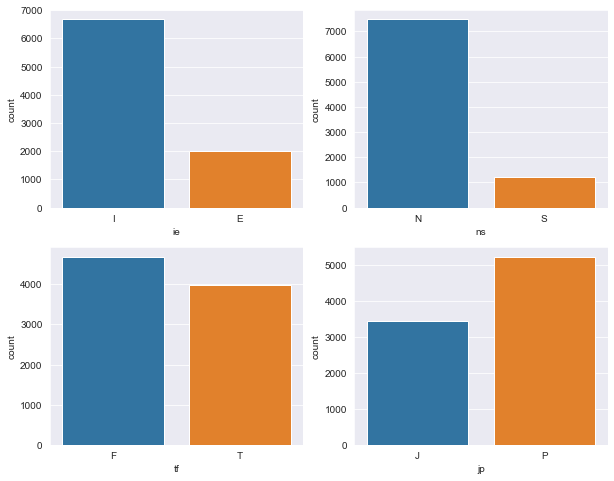

In [8]:
ie_types = df['ie']
ns_types = df['ns']
tf_types = df['tf']
jp_types = df['jp']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8)) 
list_types = [ie_types, ns_types, tf_types, jp_types]
ax = ax.ravel()

for i, item in enumerate(list_types):
    #print(item)
    sns.countplot(item, ax=ax[i])

### Encoding

Convert sets into binary labels:

- 0 for I-types vs 1 for E-types
- 0 for N-types vs 1 for S-types
- 0 for T-types vs 1 for F-types
- 0 for J-types vs 1 for P-types

In [9]:
#Setting up global labels to identify each type and axes
label_ie = ['Introvertion', 'Extrovertion']
label_ns = ['Intuition', 'Sensing']
label_tf = ['Thinking', 'Feeling']
label_jp = ['Judging', 'Perceiving']
lst_axes = ['ie', 'ns', 'tf', 'jp']

In [10]:
df['ie'] = df['ie'].map(lambda x: 0 if x == 'I' else 1)
df['ns'] = df['ns'].map(lambda x: 0 if x == 'N' else 1)
df['tf'] = df['tf'].map(lambda x: 0 if x == 'T' else 1)
df['jp'] = df['jp'].map(lambda x: 0 if x == 'J' else 1)

### Train Test Split

In [11]:
#setting up different targets
X = df['cleaned_str']
y_ie = df['ie']
y_ns = df['ns']
y_tf = df['tf']
y_jp = df['jp']

In [12]:
#Train test split with stratify
X_train, X_val, y_train_ie, y_val_ie = train_test_split(X, y_ie, random_state=42, stratify=y_ie, test_size=0.33)
X_train, X_val, y_train_ns, y_val_ns = train_test_split(X, y_ns, random_state=42, stratify=y_ns, test_size=0.33)
X_train, X_val, y_train_tf, y_val_tf = train_test_split(X, y_tf, random_state=42, stratify=y_tf, test_size=0.33)
X_train, X_val, y_train_jp, y_val_jp = train_test_split(X, y_jp, random_state=42, stratify=y_jp, test_size=0.33)


### Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer 

In [13]:
# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
spacy_stop_words = spacy.lang.en.stop_words.STOP_WORDS
type_stopword = [x.lower() for x in df['type'].unique()]
type_stopwords = type_stopword + [x + 's' for x in type_stopword]

# Create our list of punctuation marks
punctuations = string.punctuation

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in spacy_stop_words and word not in type_stopwords and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [14]:
tvec = TfidfVectorizer(tokenizer = spacy_tokenizer, max_features=10000, max_df=0.3)

#transforming X_train and X test
X_train_tvec = tvec.fit_transform(X_train)
X_val_tvec = tvec.transform(X_val)

## Modelling

### User Defined Functions

In [15]:
def classifiermodel(X_train, y_train, X_test, y_test, model, gs=False, param=False, title=None, label=None):
    
    """"
    Function to fit and display scores of the model, the confusion matrix and AUC ROC
    
    Take in Arguements:
     - X_train, y_train, X_test, y_test - the train test split data
     - model - the type of model to fit data
     - gs - if the model parsed in is a grid search
     - param - If need to print best parameters for pipe steps
     - label - list of labels that model is classifying
     - title - title to print the results
     
     Returns:
     - Predicated Value
     - the predict probabllity 
     - the model (with hyperparams)
     
    """
    #print(">>> Training model: ", model)
    #print("...")
    model.fit(X_train, y_train)
    trgscore = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    valscore = model.score(X_test, y_test)
    
    #getting the probabilities of test data
    
    if gs:
        best_model = model.best_estimator_
        best_score = model.best_score_
        best_params =  model.best_params_
    else:
        best_model = model
        best_score = trgscore
        best_params = model.get_params()
        
    proba = model.predict_proba(X_test)
    proba = proba[:, 1]

    print(f'======== {title} =================\n')
    
    if param:
        print('Best parameters  : ', best_params)
        print()
    print('Best CV  score   : ', best_score)
    print('Training score   :', trgscore)
    print('Validation score :', valscore)
    print('Accuracy         :', accuracy_score(y_pred, y_test))
    print('MCC Score        :', matthews_corrcoef(y_pred, y_test))
    print()
    print(classification_report(y_test, y_pred, target_names=label))
        
    return y_pred, proba, best_model

In [18]:
def model_metrics(true, pred, prob, cm=False, show_df=False, title = 'Model_Metrics', labels=['0', '1']):
    """
    Function that calculates and returns a dataframe with classification metrics.
    Input
    true: true values of target variable
    pred: predicted values of target variable
    prob: probability of positive class 
    cm: confusion matrix will be plot if == True
    show_df: dataframe with metrics will be displayed if == True
    title: the column name for the dataframe that is displayed/returned
    labels: the negative and positive class labels 
    
    Output
    df: dataframe with classification metrics
    
    Metric Descriptions
    True Positive: total number of positive class correctly predicted
    True Negative: total number of negative class correctly predicted
    False Positives (Type I Error): total number of negatives class predicted as positive
    False Negative (Type II Error): total number of positives class predicted as negative
    
    Accuracy: Percentage of observations correctly classified.
    Misclassification Rate: Percentage of observations incorrectly classified.
    Sensitivity(Recall): Percentage of observations with positive correctly classified.
    Specificity: Percentage of observations with negative correctly classified.
    Precision: Percentage of positive class prediction vs total positive predictions
    F1 Score: Weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
    AUC ROC: AUC ROC Score
    """
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    fpr, tpr, threhold = roc_curve(true, prob)
    
    if cm:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        ax = ax.ravel()
 
        #plot confusion matrix
        ax[0].set_title('Confusion Matrix')
        sns.heatmap([[tn,fp],[fn,tp]], 
                         annot=True, 
                         cmap="YlGnBu", 
                         cbar_kws={'label': 'Scale'}, 
                         fmt='g', ax=ax[0])
        ax[0].set_xticklabels(labels)
        ax[0].set_yticklabels(labels)
        ax[0].set(ylabel="True Label", xlabel="Predicted Label")
        
        #plot roc_curve
        ax[1].set_title('ROC Curve')
        ax[1].plot(fpr, tpr, lw = 2, label='ROC curve (area = %0.2f)' % roc_auc_score(true,prob))
        ax[1].plot([0, 1], [0,1], lw = 2, linestyle = '--')
        ax[1].set(ylabel="True Positive Rate", xlabel="False Positive Rate")
        ax[1].legend(loc='lower right')
        
    df = pd.DataFrame(data = [(tp+tn)/(tp+fp+tn+fn),
                              1- ((tp+tn)/(tp+fp+tn+fn)),
                              tp/(tp+fn),
                              tn/(tn+fp),
                              tp/(tp+fp),
                              tp,
                              fp,
                              fn,
                              tn,
                              f1_score(true, pred),
                              roc_auc_score(true,prob),
                              matthews_corrcoef(true, pred)],
                         index = ['Accuracy',
                                  'Misclassification Rate',
                                  'Sensitivity (Recall)',
                                  'Specificity',
                                  'Precision', 
                                  'True Positive',
                                  'False Positive',
                                  'False Negative',
                                  'True Negative', 
                                  'F1-Score',
                                  'AUC Score',
                                  'Matthews Correlation'],
                        columns = [title])
    if show_df:
        display(df)
    return(df)

In [78]:
def show_most_informative_features(vectorizer, clf, n=20):
    
    """"
    Function to show the positive and neg important features
    Only works for classifiers with Coefficients
    
    Take in Arguements:
     - Vectorizer - the word vectorizer used as features
     - clf - the classifer 
     - n - the top number of features to show
     
     Returns:
     - the dataframe of all the features and the coefficients.
    """
    
    feature_names = vectorizer.get_feature_names()
    
    #link the feature names with the coef_[0] -> the top coeff for positive class
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    
    top_pos = coefs_with_fns[:-(n + 1):-1]
    top_neg = coefs_with_fns[:n]
    
    #display the positive and neg coefficients
    show_posfeat = pd.DataFrame(top_pos, columns=['positive_coeff', 'pos_feature'])
    show_negfeat = pd.DataFrame(top_neg, columns=['negative_coeff', 'neg_feature'])
    show_feat = show_posfeat.join(show_negfeat)
    display(show_feat)
    
    featimpt = pd.DataFrame(coefs_with_fns, columns=['feature_importance', 'feature']).sort_values(by='feature_importance', ascending=False)
        
    return featimpt
    

In [83]:
def plot_impt_features(features_df, title, top_feat=20, color='b'):
    
    """"
    Function to plot the top features of the positive class 
    
    
    Take in Arguements:
     - features_df - the dataframe of the features and their corresponding score
     - Ttile - title of graph
     - top_feat - the top number of features to show
     - color - the desired color, default to green
     
    """
    
    plt.figure(figsize=(12,6))
    sns.barplot(x = features_df['feature_importance'][:top_feat], y = features_df['feature'][:top_feat], color=color)
    plt.title(title, fontsize=18)
    plt.xlabel('Feature importance', fontsize=14)
    plt.xticks(size=13)
    plt.ylabel(None)
    plt.yticks(size=13);

### Global Parameters

In [19]:
#Global Variables for Gridsearch
cv = 5
n_jobs = -1

In [20]:
#Global Parameters for Pipeline for LogReg and XGBoost

#Logistic Regression ===========================================
lr_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('lr', LogisticRegression(random_state = 42, max_iter=1000))])


lr_param_grid = {'lr__solver': ['lbfgs','liblinear'],
                 'lr__C':[1.0, 0.1],
                 'lr__penalty':['l1'],
                 'lr__class_weight':['auto', 'balanced']}

#xgBoost =======================================================

xgb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('xgb', XGBClassifier(random_state = 42))]) 

xgb_param_grid = {
    'xgb__eval_metric' : ['auc'], #optimized to auc
    'xgb__subsample' : [0.5], # Randomly sample 0.5 of the data to prevent overfitting
    'xgb__colsample_bytree' : [0.5], # Typical values range between 0.5-0.9
    'xgb__learning_rate' : [.01], # common to have small values in the range of 0.1 to 0.3
    'xgb__n_estimators' : [100,500], #500
    'xgb__reg_alpha' : [0.01], # L1 regularization term on weight 
    'xgb__scale_pos_weight': [1]
}
    


### Introversion VS Extroversion (Energy Axis)

In [21]:
#X_train, X_val, y_train_ie, y_val_ie

#### Logistic Regression

In [22]:
%%time

#gridsearch with SMOTE pipeline (for imbalanced data)
ie_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ie_lr_pred, ie_lr_proba, ie_lr_model = classifiermodel(X_train_tvec, y_train_ie, X_val_tvec, y_val_ie,
                                    model=ie_lr_gs, gs=True, param=True,
                                    title='I vs E - LogisticRegression', label=label_ie)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


======== I vs E - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.5314350816051255
Training score   : 0.8202049405385929
Validation score : 0.5291689019106177
Accuracy         : 0.6241704505763186
MCC Score        : 0.04955668413419042

              precision    recall  f1-score   support

Introvertion       0.78      0.71      0.74      2203
Extrovertion       0.26      0.35      0.30       660

    accuracy                           0.62      2863
   macro avg       0.52      0.53      0.52      2863
weighted avg       0.66      0.62      0.64      2863

Wall time: 1min 44s


,IE LogReg
Accuracy,0.624
Misclassification Rate,0.376
Sensitivity (Recall),0.347
Specificity,0.707
Precision,0.262
True Positive,229.000
False Positive,645.000
False Negative,431.000
True Negative,"1,558.000"
F1-Score,0.299


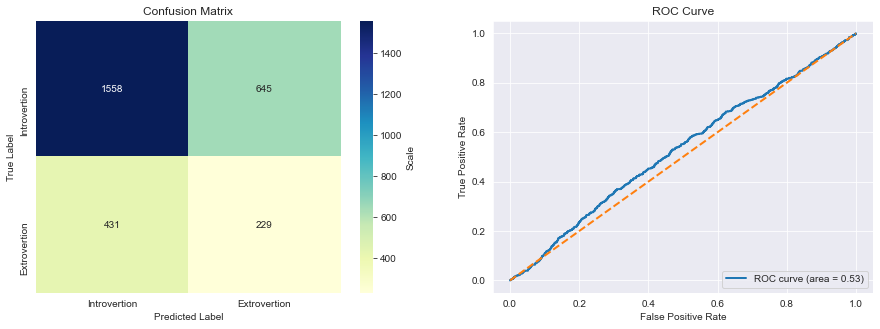

In [23]:
ie_lr_m = model_metrics(y_val_ie, 
                        ie_lr_pred, 
                        ie_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'IE LogReg', labels=label_ie)
ie_lr_m 

In [79]:
#model is a pipeline, extract the classifier value
ie_lr = ie_lr_model.steps[1][1]
ie_lr_featdf = show_most_informative_features(tvec, ie_lr, n=5)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,7.133,path,-7.522,sum
1,7.059,reasonably,-7.464,contrast
2,7.058,contest,-5.795,differently
3,6.931,literature,-5.084,2nd
4,6.554,vacation,-4.987,spoil


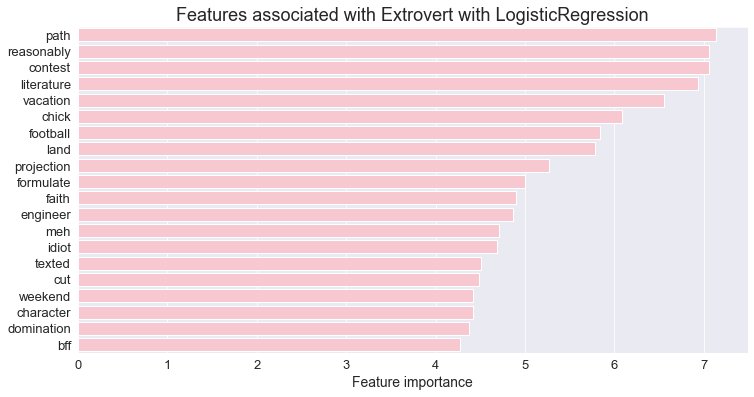

In [84]:
plot_impt_features(ie_lr_featdf, 'Features associated with Extrovert with LogisticRegression', color='pink')

#### XGBoost

In [25]:
%%time

ie_xgb_gs = GridSearchCV(xgb_pipe, 
                      param_grid=xgb_param_grid, 
                      cv=cv, n_jobs=n_jobs, 
                      scoring='roc_auc', verbose=1)

ie_xgb_pred, ie_xgb_proba, ie_xgb_model = classifiermodel(X_train_tvec, y_train_ie, X_val_tvec, y_val_ie, 
                            model=ie_xgb_gs, gs=True, param=True,
                            title='I vs E - XGBoost', label=label_ie)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished


======== I vs E - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.5078080493047249
Training score   : 0.6426765722540371
Validation score : 0.49361373608990494
Accuracy         : 0.7401327279077891
MCC Score        : -0.03012689529184688

              precision    recall  f1-score   support

Introvertion       0.77      0.95      0.85      2203
Extrovertion       0.17      0.03      0.06       660

    accuracy                           0.74      2863
   macro avg       0.47      0.49      0.45      2863
weighted avg       0.63      0.74      0.67      2863

Wall time: 3min 16s


,IE XGBoost
Accuracy,0.740
Misclassification Rate,0.260
Sensitivity (Recall),0.033
Specificity,0.952
Precision,0.172
True Positive,22.000
False Positive,106.000
False Negative,638.000
True Negative,"2,097.000"
F1-Score,0.056


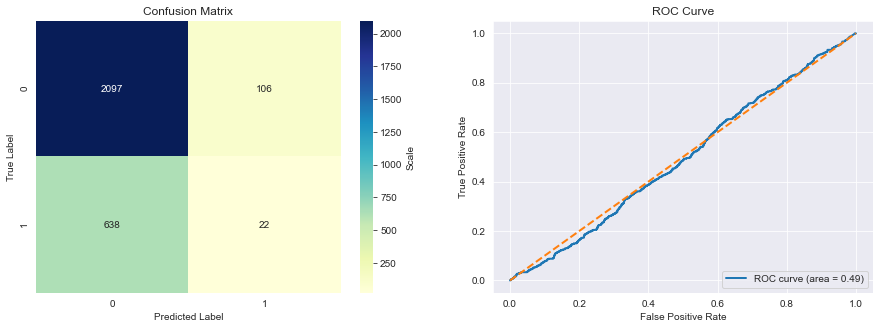

In [26]:
ie_xgb_m = model_metrics(y_val_ie, 
                        ie_xgb_pred, 
                        ie_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'IE XGBoost')
ie_xgb_m

In [73]:
ie_xgb = ie_xgb_model.steps[1][1]
ie_xgb

XGBClassifier(colsample_bytree=0.5, eval_metric='auc', learning_rate=0.01,
              n_estimators=500, random_state=42, reg_alpha=0.01, subsample=0.5)

In [86]:
# put feature importance into a dataframe
ie_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': ie_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)

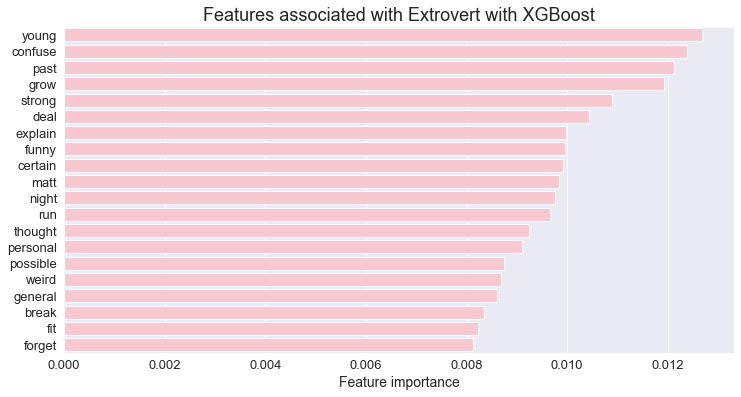

In [87]:
plot_impt_features(ie_xgb_featdf, 'Features associated with Extrovert with XGBoost', color='pink')

### Intuition VS Sensing (Information Axis)

In [28]:
#X_train, X_val, y_train_ns, y_val_ns

#### Logistic Regression

In [29]:
%%time

#gridsearch with SMOTE pipeline (for imbalanced data)
ns_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ns_lr_pred, ns_lr_proba, ns_lr_model = classifiermodel(X_train_tvec, y_train_ns, X_val_tvec, y_val_ns,
                                    model=ns_lr_gs, gs=True, param=True,
                                    title='N vs S - LogisticRegression', label=label_ns)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


======== N vs S - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.49221079579970495
Training score   : 0.90284543133185
Validation score : 0.5084617278378434
Accuracy         : 0.6863429968564443
MCC Score        : 0.005382109886468934

              precision    recall  f1-score   support

   Intuition       0.86      0.76      0.81      2468
     Sensing       0.14      0.25      0.18       395

    accuracy                           0.69      2863
   macro avg       0.50      0.50      0.49      2863
weighted avg       0.76      0.69      0.72      2863

Wall time: 2min 48s


,NS LogReg
Accuracy,0.686
Misclassification Rate,0.314
Sensitivity (Recall),0.251
Specificity,0.756
Precision,0.141
True Positive,99.000
False Positive,602.000
False Negative,296.000
True Negative,"1,866.000"
F1-Score,0.181


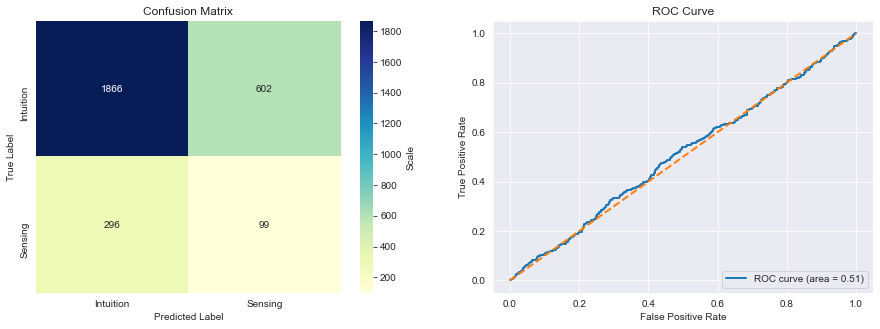

In [30]:
ns_lr_m = model_metrics(y_val_ns, 
                        ns_lr_pred, 
                        ns_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'NS LogReg', labels=label_ns)
ns_lr_m 

In [88]:
#model is a pipeline, extract the classifier value
ns_lr = ns_lr_model.steps[1][1]
ns_lr_featdf = show_most_informative_features(tvec, ns_lr, n=5)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,9.988,freaky,-7.834,charlie
1,9.055,platform,-7.779,hand
2,8.234,crunch,-6.200,direct
3,8.227,respectively,-6.044,asshole
4,7.752,rainy,-6.012,case


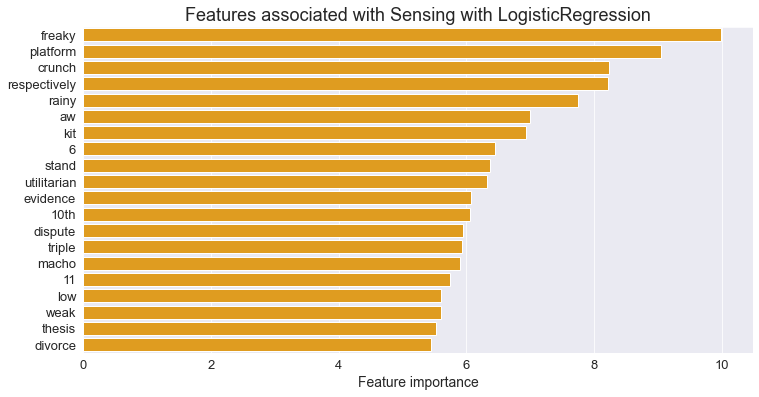

In [91]:
plot_impt_features(ns_lr_featdf, 'Features associated with Sensing with LogisticRegression', color='orange')

#### XGBoost

In [32]:
%%time

ns_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ns_xgb_pred, ns_xgb_proba, ns_xgb_model = classifiermodel(X_train_tvec, y_train_ns, X_val_tvec, y_val_ns, 
                            model=ns_xgb_gs, gs=True, param=True,
                            title='N vs S - XGBoost', label=label_ns)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.1min finished


======== N vs S - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.5062008320315889
Training score   : 0.5995374587483386
Validation score : 0.5026465338612724
Accuracy         : 0.8358365351030388
MCC Score        : 0.010381515499568452

              precision    recall  f1-score   support

   Intuition       0.86      0.96      0.91      2468
     Sensing       0.16      0.04      0.07       395

    accuracy                           0.84      2863
   macro avg       0.51      0.50      0.49      2863
weighted avg       0.77      0.84      0.79      2863

Wall time: 4min 29s


,NS XGBoost
Accuracy,0.836
Misclassification Rate,0.164
Sensitivity (Recall),0.043
Specificity,0.963
Precision,0.156
True Positive,17.000
False Positive,92.000
False Negative,378.000
True Negative,"2,376.000"
F1-Score,0.067


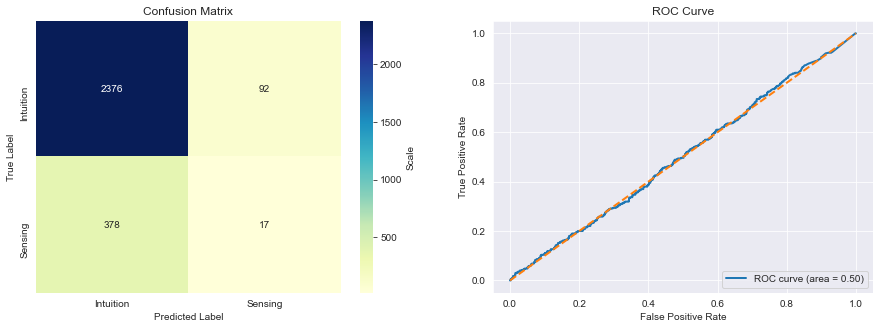

In [33]:
ns_xgb_m = model_metrics(y_val_ns, 
                        ns_xgb_pred, 
                        ns_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'NS XGBoost', labels=label_ns)
ns_xgb_m

In [105]:
ns_xgb = ns_xgb_model.steps[1][1]
ns_xgb

XGBClassifier(colsample_bytree=0.5, eval_metric='auc', learning_rate=0.01,
              n_estimators=500, random_state=42, reg_alpha=0.01, subsample=0.5)

In [107]:
# put feature importance into a dataframe
ns_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': ns_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)


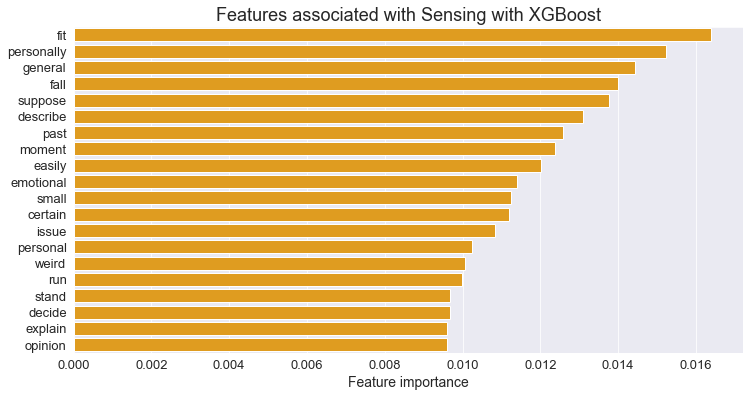

In [108]:
plot_impt_features(ns_xgb_featdf, 'Features associated with Sensing with XGBoost', color='orange')

### Thinking VS Feeling (Decision Making Axis)

In [34]:
#X_train, X_val, y_train_tf, y_val_tf

#### Logistic Regression

In [35]:
%%time

tf_lr_gs = GridSearchCV(lr_pipe , 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

tf_lr_pred, tf_lr_proba, tf_lr_model = classifiermodel(X_train_tvec, y_train_tf, X_val_tvec, y_val_tf,
                                    model=tf_lr_gs, gs=True, param=True,
                                    title='T vs F - LogisticRegression', label=label_tf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   54.0s finished


======== T vs F - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.5160473787793117
Training score   : 0.6809702046385697
Validation score : 0.5057365040341243
Accuracy         : 0.5019210618232623
MCC Score        : -0.0015275405598863773

              precision    recall  f1-score   support

    Thinking       0.46      0.47      0.46      1314
     Feeling       0.54      0.53      0.54      1549

    accuracy                           0.50      2863
   macro avg       0.50      0.50      0.50      2863
weighted avg       0.50      0.50      0.50      2863

Wall time: 59.3 s


,TF LogReg
Accuracy,0.502
Misclassification Rate,0.498
Sensitivity (Recall),0.532
Specificity,0.467
Precision,0.540
True Positive,824.000
False Positive,701.000
False Negative,725.000
True Negative,613.000
F1-Score,0.536


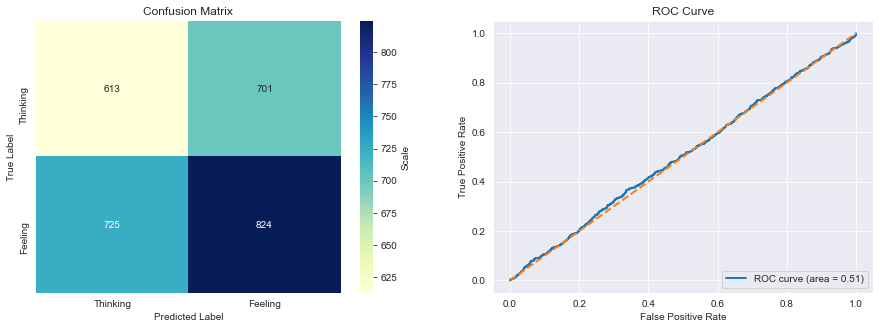

In [36]:
tf_lr_m = model_metrics(y_val_tf, 
                        tf_lr_pred, 
                        tf_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'TF LogReg', labels=label_tf)
tf_lr_m 

In [163]:
tf_lr = tf_lr_model.steps[1][1]
tf_lr_featdf = show_most_informative_features(tvec, tf_lr, n=30)


,positive_coeff,pos_feature,negative_coeff,neg_feature
0,3.629,age,-3.190,cautious
1,2.136,penguin,-2.657,straight
2,2.136,weight,-2.434,correlate
3,2.102,lazy,-2.411,congratulation
4,2.059,cognitive,-2.382,cute
5,1.959,congrats,-2.316,fear
6,1.938,offend,-2.294,species
7,1.927,audio,-2.129,organize
8,1.906,outside,-2.077,snape
9,1.839,action,-2.038,3w2


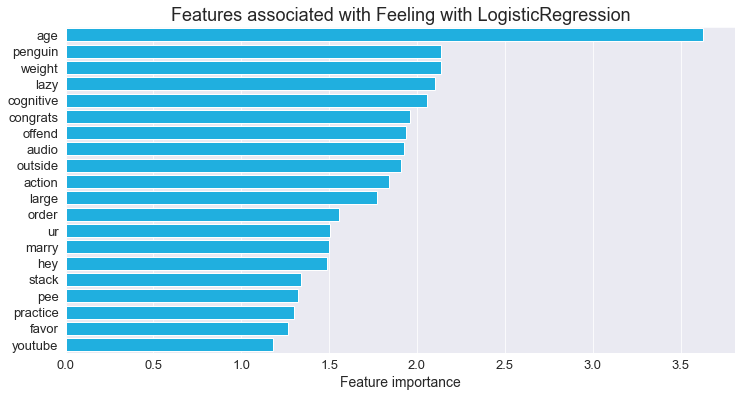

In [102]:
plot_impt_features(tf_lr_featdf, 'Features associated with Feeling with LogisticRegression', color='deepskyblue')

#### XGBoost

In [38]:
%%time
tf_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

tf_xgb_pred, tf_xgb_proba, tf_xgb_model = classifiermodel(X_train_tvec, y_train_tf, X_val_tvec, y_val_tf, 
                            model=tf_xgb_gs, gs=True, param=True,
                            title='T vs F - XGBoost', label=label_tf)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.3min remaining:   50.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


======== T vs F - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.49519366209515
Training score   : 0.810040994478234
Validation score : 0.5015974856857618
Accuracy         : 0.5302130632203982
MCC Score        : 0.0068110682211365015

              precision    recall  f1-score   support

    Thinking       0.47      0.17      0.24      1314
     Feeling       0.54      0.84      0.66      1549

    accuracy                           0.53      2863
   macro avg       0.50      0.50      0.45      2863
weighted avg       0.51      0.53      0.47      2863

Wall time: 2min 13s


,TF XGBoost
Accuracy,0.530
Misclassification Rate,0.470
Sensitivity (Recall),0.840
Specificity,0.165
Precision,0.543
True Positive,"1,301.000"
False Positive,"1,097.000"
False Negative,248.000
True Negative,217.000
F1-Score,0.659


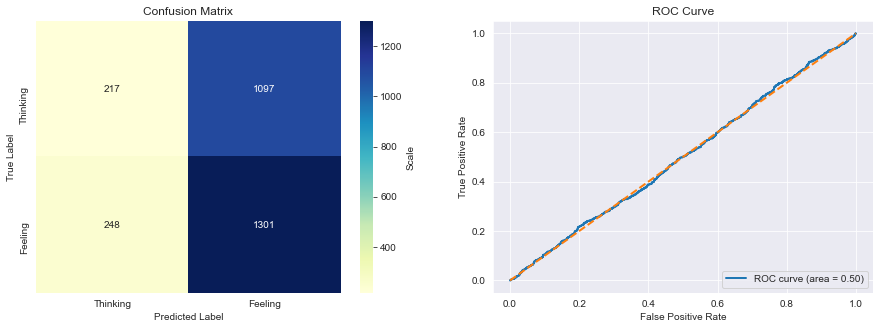

In [39]:
tf_xgb_m = model_metrics(y_val_tf, 
                        tf_xgb_pred, 
                        tf_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'TF XGBoost', labels=label_tf)
tf_xgb_m

In [103]:
tf_xgb = tf_xgb_model.steps[1][1]

# put feature importance into a dataframe
tf_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': tf_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)


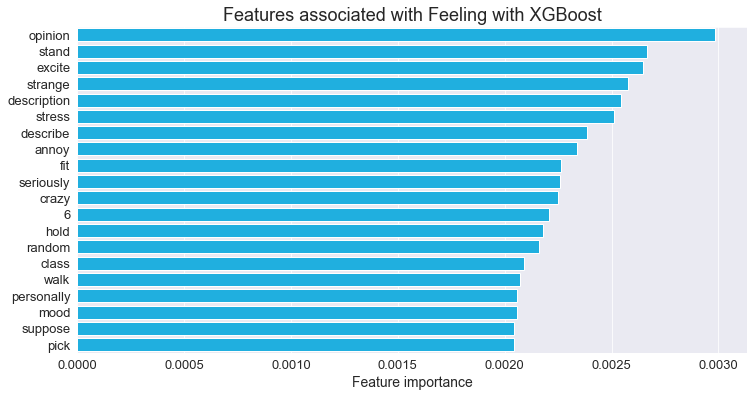

In [104]:
plot_impt_features(tf_xgb_featdf, 'Features associated with Feeling with XGBoost', color='deepskyblue')

### Judging VS Perceiving (Organization Axis)

In [43]:
#X_train, X_val, y_train_jp, y_val_jp

#### Logistic Regression

In [44]:
%%time

jp_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)


jp_lr_pred, jp_lr_proba, jp_lr_model = classifiermodel(X_train_tvec, y_train_jp, X_val_tvec, y_val_jp,
                                    model=jp_lr_gs, gs=True, param=True,
                                    title='J vs P - LogisticRegression', label=label_jp)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


======== J vs P - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.7074214384858344
Training score   : 0.8178267816885431
Validation score : 0.7010234223938696
Accuracy         : 0.656304575619979
MCC Score        : 0.28357380548100397

              precision    recall  f1-score   support

     Judging       0.56      0.57      0.57      1133
  Perceiving       0.72      0.71      0.71      1730

    accuracy                           0.66      2863
   macro avg       0.64      0.64      0.64      2863
weighted avg       0.66      0.66      0.66      2863

Wall time: 1min 14s


,JP LogReg
Accuracy,0.656
Misclassification Rate,0.344
Sensitivity (Recall),0.710
Specificity,0.575
Precision,0.718
True Positive,"1,228.000"
False Positive,482.000
False Negative,502.000
True Negative,651.000
F1-Score,0.714


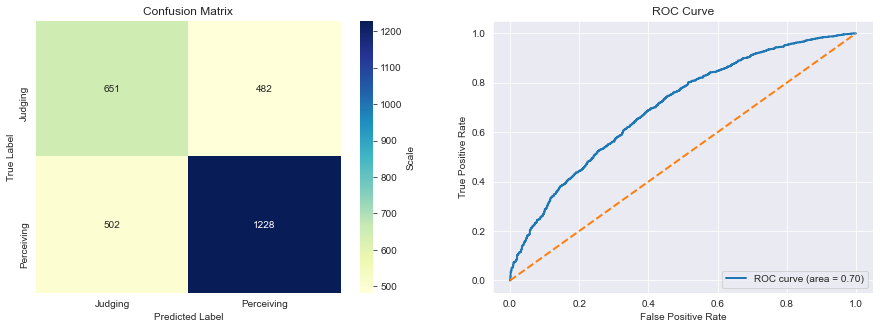

In [45]:
jp_lr_m = model_metrics(y_val_jp, 
                        jp_lr_pred, 
                        jp_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'JP LogReg', labels=label_jp)
jp_lr_m 

In [162]:
jp_lr = jp_lr_model.steps[1][1]
jp_lr_featdf = show_most_informative_features(tvec, jp_lr, n=5)


,positive_coeff,pos_feature,negative_coeff,neg_feature
0,11.772,ne,-15.717,ni
1,7.450,lazy,-6.186,6w5
2,5.744,7w6,-5.877,doorslam
3,5.440,wee,-5.789,bet
4,4.997,pressure,-5.787,plan


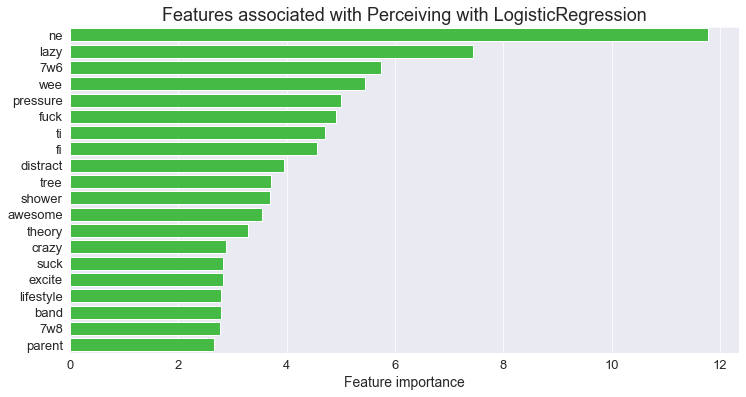

In [110]:
plot_impt_features(jp_lr_featdf, 'Features associated with Perceiving with LogisticRegression', color='limegreen')


#### XGBoost

In [47]:
%%time
jp_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

jp_xgb_pred, jp_xgb_proba, jp_xgb_model = classifiermodel(X_train_tvec, y_train_jp, X_val_tvec, y_val_jp, 
                            model=jp_xgb_gs, gs=True, param=True,
                            title='J vs P - XGBoost', label=label_jp)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.5min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished


======== J vs P - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.6448405704761899
Training score   : 0.7539219570800704
Validation score : 0.6511833640292027
Accuracy         : 0.6398882291302829
MCC Score        : 0.19344058738505301

              precision    recall  f1-score   support

     Judging       0.60      0.26      0.36      1133
  Perceiving       0.65      0.89      0.75      1730

    accuracy                           0.64      2863
   macro avg       0.63      0.57      0.56      2863
weighted avg       0.63      0.64      0.60      2863

Wall time: 2min 36s


,JP XGBoost
Accuracy,0.640
Misclassification Rate,0.360
Sensitivity (Recall),0.889
Specificity,0.259
Precision,0.647
True Positive,"1,538.000"
False Positive,839.000
False Negative,192.000
True Negative,294.000
F1-Score,0.749


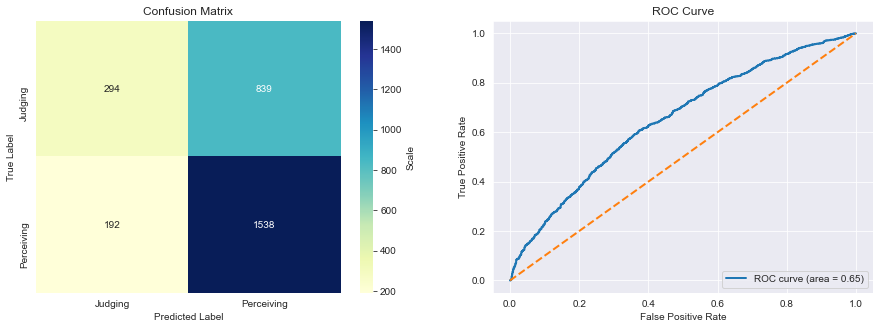

In [48]:
jp_xgb_m = model_metrics(y_val_jp, 
                        jp_xgb_pred, 
                        jp_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'JP XGBoost', labels=label_jp)
jp_xgb_m

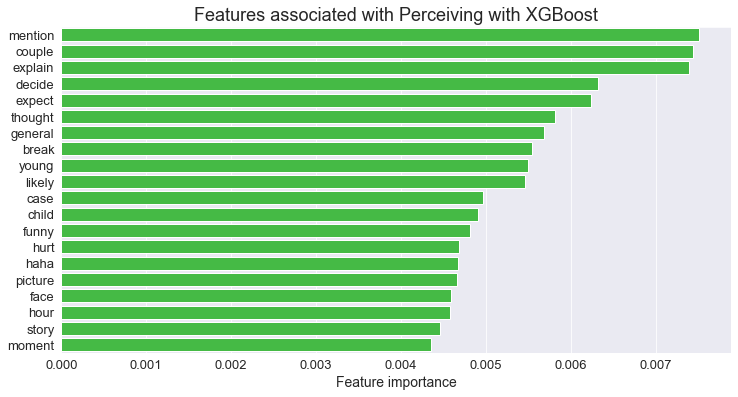

In [113]:
# put feature importance into a dataframe
jp_xgb = jp_xgb_model.steps[1][1]

jp_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': jp_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)

plot_impt_features(jp_xgb_featdf, 'Features associated with Perceiving with XGBoost', color='limegreen')

### Summary of Performance

In [49]:
lst_metrics = [ie_lr_m, ie_xgb_m, ns_lr_m, ns_xgb_m, tf_lr_m, tf_xgb_m, jp_lr_m, jp_xgb_m]
combine_metrics = pd.concat((items for items in lst_metrics), axis=1, join='inner')
combine_metrics.reset_index().rename(columns={combine_metrics.index.name:'metrics'})  

combine_metrics

,IE LogReg,IE XGBoost,NS LogReg,NS XGBoost,TF LogReg,TF XGBoost,JP LogReg,JP XGBoost
Accuracy,0.624,0.740,0.686,0.836,0.502,0.530,0.656,0.640
Misclassification Rate,0.376,0.260,0.314,0.164,0.498,0.470,0.344,0.360
Sensitivity (Recall),0.347,0.033,0.251,0.043,0.532,0.840,0.710,0.889
Specificity,0.707,0.952,0.756,0.963,0.467,0.165,0.575,0.259
Precision,0.262,0.172,0.141,0.156,0.540,0.543,0.718,0.647
True Positive,229.000,22.000,99.000,17.000,824.000,"1,301.000","1,228.000","1,538.000"
False Positive,645.000,106.000,602.000,92.000,701.000,"1,097.000",482.000,839.000
False Negative,431.000,638.000,296.000,378.000,725.000,248.000,502.000,192.000
True Negative,"1,558.000","2,097.000","1,866.000","2,376.000",613.000,217.000,651.000,294.000
F1-Score,0.299,0.056,0.181,0.067,0.536,0.659,0.714,0.749


All models are not performing ideally and it could be due to the data imbalance or as previously dicussed, the words are too similar. However, we will select the best models (incidentally Logistic Regression seemed to be better for all 4 axes) for each axis based on the AUC ROC and attempt to do a prediction.

In [124]:
#select all the best performing model for the 4 traits
ie_selected = ie_lr
ns_selected = ns_lr
tf_selected = tf_lr
jp_selected = jp_lr

## Prediction

- Provide quotes from some famous people and predict their MBTI
- Testing text: Do basic cleaning, vectorizing, passing the values into the models and run results
--------

In [115]:
def clean_text(data, add_stopwords=None, lem_stem=None):
    
    """
    Function to convert raw text to words for processing.
    Function will remove all irrevant characters(or digits), HTML tags, stopwords), 

    
    Takes in arguement:
    text- str the raw text to be converted
    add_stopwords - list of additional stopwords that needs to be added
    lem_stem - type of Lemmatization or stemming to be done
    
    return the processed text in string 
    """   
    
    #remove all URL strings
    URL_RE = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))')

    #all non word characters
    #REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

    #all non word characters
    SYMBOLS_RE = re.compile('[^a-zA-Z]')
    
    STOPWORDS = set(stopwords.words('english'))
    
    if add_stopwords is not None:
        STOPWORDS.update(add_stopwords)
    #print("stop words ", STOPWORDS)
    
    #text = BeautifulSoup(data, 'lxml').text # remove HTML tags
    #print("removed html tags: ", text)
    #print()
    text = data.lower() # lowercase whole text
    
    text = URL_RE.sub('urlstr', text) #capturing the url 
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    
    text_list = [word for word in text.split() if word not in STOPWORDS] # delete stopwords from text
    
    if lem_stem == 'lem':
        lemmatizer = WordNetLemmatizer()
        text_processed = [lemmatizer.lemmatize(w) for w in text_list]
    elif lem_stem == 'stemp':
        #5 Stemming
        stemmer = PorterStemmer()
        text_processed = [stemmer.stem(w) for w in text_list]
    elif lem_stem == 'stems':
        stemmer = SnowballStemmer("english")
        text_processed = [stemmer.stem(w) for w in text_list]
    else:
        text_processed = text_list
    
    #return the list of cleaned, processed words
    return text_processed
    

In [144]:
#Function to map the key along the personality trait

def mapkey(prediction, trait):
    if (trait == 'IE'):
        return 'I' if prediction == 0 else 'E'
    elif(trait == 'NS'):
        return 'N' if prediction == 0 else 'S'
    elif(trait == 'TF'):
        return 'T' if prediction == 0 else 'F'
    else:
        return 'J' if prediction == 0 else 'P'

In [150]:
#Function to Predict the type

def predictMBTI(test):
    results = ""
    
    #Predicting I-E
    print("====== Introversion vs Extroversion ======")
    ie_predictions = ie_selected.predict(test)
    print(ie_selected.predict_proba(test))
    results += mapkey(ie_predictions, 'IE')
    print()

    #Predicting N-S
    print("====== INtuition vs Sensing ======")
    ns_predictions = ns_selected.predict(test)
    print(ns_selected.predict_proba(test))
    results += mapkey(ns_predictions, 'NS')
    print()

    print("====== Thinking vs Feeling ======")
    tf_predictions = tf_selected.predict(test)
    print(tf_selected.predict_proba(test))
    results += mapkey(tf_predictions, 'TF')
    print()


    print("====== Judging vs Perceiving ======")
    jp_predictions = jp_selected.predict(test)
    print(jp_selected.predict_proba(test))
    results += mapkey(jp_predictions, 'JP')
    print()


    print("Results: ", results)
    
    return results

### Prediction 1: ESTP

**[Donald Trump's quotes](https://allthatsinteresting.com/donald-trump-quotes)**

*We have a 5 billion dollar website. I have so many websites. I have them all over the place... I hire people... it costs me three dollars. I will build a great wall--and nobody builds walls better than me, believe me--and I'll build them very inexpensively. I will build a great, great wall on our southern border, and I will make Mexico pay for that wall. Mark my words. This is the most reasonably path I can take, with domination! The line of 'Make America great again,' the phrase, that was mine, I came up with it about a year ago, and I kept using it, and everybody's using it, they are all loving it. I don't know, I guess I should copyright it, maybe I have copyrighted it.*

In [130]:
predict1 = "We have a 5 billion dollar website. I have so many websites. I have them all over the place... I hire people... it costs me three dollars. I will build a great wall--and nobody builds walls better than me, believe me--and I'll build them very inexpensively. I will build a great, great wall on our southern border, and I will make Mexico pay for that wall. Mark my words. This is the most reasonably path I can take, with domination! The line of 'Make America great again,' the phrase, that was mine, I came up with it about a year ago, and I kept using it, and everybody's using it, they are all loving it. I don't know, I guess I should copyright it, maybe I have copyrighted it. "

In [131]:
#Do basic cleaning, 
list_cleaned = clean_text(predict1, add_stopwords=None, lem_stem=None)
predict1_cleaned = " ".join(r for r in list_cleaned) 
predict1_cleaned

'billion dollar website many websites place hire people costs three dollars build great wall nobody builds walls better believe build inexpensively build great great wall southern border make mexico pay wall mark words reasonably path take domination line make america great phrase mine came year ago kept using everybody using loving know guess copyright maybe copyrighted'

In [132]:
#vectorizing
X_test = tvec.transform([predict1_cleaned])
X_test.shape

(1, 10000)

In [151]:
predictMBTI(X_test)

====== Introversion vs Extroversion ======
[[0.08689449 0.91310551]]

====== INtuition vs Sensing ======
[[0.82423829 0.17576171]]

====== Thinking vs Feeling ======
[[0.48061794 0.51938206]]

====== Judging vs Perceiving ======
[[0.43385374 0.56614626]]

Results:  ENFP


'ENFP'

The system predicted that Donald Trump is a **ENFP**. But according to [personalitypathways](https://www.personalitypathways.com/personality-type/donald-trump-estj-personality/) that he is more of a ESTP, so does some other personlity analysis sites, based on his reaction and behaviour. Not so much of his speech.

*Comments: ESTPs aren’t policy people. They don’t want to talk about things in fine details. Instead, they use their energy to uncover solutions. Spontaneous by their nature, ESTPs are also very perceptive.
If you need someone to be the face of a cause or to rally people behind an unpopular initiative, choose an ESTP.*

-- Sounds really like Trump to me.

### Prediction 2: INFJ

**[Nelson Mandela's quotes](https://www.inc.com/peter-economy/17-wise-nelson-mandela-quotes-that-will-inspire-your-success.html)**

*Justice and I became friends, though we were opposites in many ways – he was extroverted, I was introverted; he was lighthearted, I was serious. I enjoyed the discipline and solitariness of long-distance running, which allowed me to escape from the hurly-burly of school life.I went as an observer, not a participant, for I do not think that I ever spoke. I wanted to understand the issues under discussion, evaluate the arguments, see the calibre of the men involved. I learned that courage was not the absence of fear, but the triumph over it. The brave man is not he who does not feel afraid, but he who conquers that fear No one is born hating another person because of the color of his skin, or his background, or his religion. People must learn to hate, and if they can learn to hate, they can be taught to love, for love comes more naturally to the human heart than its opposite. Everyone can rise above their circumstances and achieve success if they are dedicated to and passionate about what they do.Do not judge me by my successes, judge me by how many times I fell down and got back up again.*

In [158]:
predict2 = 'Justice and I became friends, though we were opposites in many ways – he was extroverted, I was introverted; he was lighthearted, I was serious. I enjoyed the discipline and solitariness of long-distance running, which allowed me to escape from the hurly-burly of school life.I went as an observer, not a participant, for I do not think that I ever spoke. I wanted to understand the issues under discussion, evaluate the arguments, see the calibre of the men involved. I learned that courage was not the absence of fear, but the triumph over it. The brave man is not he who does not feel afraid, but he who conquers that fear No one is born hating another person because of the color of his skin, or his background, or his religion. People must learn to hate, and if they can learn to hate, they can be taught to love, for love comes more naturally to the human heart than its opposite. Everyone can rise above their circumstances and achieve success if they are dedicated to and passionate about what they do.Do not judge me by my successes, judge me by how many times I fell down and got back up again'

In [159]:
#Do basic cleaning, 
list_cleaned = clean_text(predict2, add_stopwords=None, lem_stem=None)
predict2_cleaned = " ".join(r for r in list_cleaned) 
predict2_cleaned

'justice became friends though opposites many ways extroverted introverted lighthearted serious enjoyed discipline solitariness long distance running allowed escape hurly burly school life went observer participant think ever spoke wanted understand issues discussion evaluate arguments see calibre men involved learned courage absence fear triumph brave man feel afraid conquers fear one born hating another person color skin background religion people must learn hate learn hate taught love love comes naturally human heart opposite everyone rise circumstances achieve success dedicated passionate judge successes judge many times fell got back'

In [160]:
#vectorizing
X_test2 = tvec.transform([predict2_cleaned])
X_test2.shape

(1, 10000)

In [161]:
predictMBTI(X_test2)

====== Introversion vs Extroversion ======
[[0.65223171 0.34776829]]

====== INtuition vs Sensing ======
[[0.82881884 0.17118116]]

====== Thinking vs Feeling ======
[[0.58140514 0.41859486]]

====== Judging vs Perceiving ======
[[0.54958012 0.45041988]]

Results:  INTJ


'INTJ'

The system predicted that Nelson Mandela, another president of a big nation, is a **INTJ**. The anti-apartheid revolutionary and former South African president (1918-2013), was an introvert with an **INFJ** personality type, according to The South African College of Applied Psychology and [16 Personalities](https://www.16personalities.com/infj-personality). 

*No other personality type is better suited to create a movement to right a wrong, no matter how big or small,” and INFJs “have very strong opinions and will fight tirelessly for an idea they believe in*

Again, it is more of the behavior and belief, not so much demostrated in short words

## Conclusion

Based on the findings, the conclusion i draw is:

- The dataset available is not comprehensive enough to determine the various types
- Certain personality traits may not be defined well in words or language. e.g. Introversion and Extroversion may not be distingusiable using language, but then again, the data we have for E types are much lesser than I types
- Personality Trait is a far more complex area and more than just words, and language expression. 
- More research needs to be done to determine if in future we are able to predict the personality just by text alone.

While many companies find personality assessments useful, the most prominent challenge is test accuracy. Even with the most in-depth assessment, it can be difficult to truly measure the nuances of human behavior and distil it into a certain category or type. Applicants may answer the assessment questions with what they think the manager wants to hear instead of their true feelings or tendencies, leading to biased results. Similarly, assessment questions may reflect more of a snapshot of the candidate at that moment in time, rather than how they think and act long term across multiple situations.

Even when test results do accurately reflect a candidate’s personality, they are not necessarily predictive of success. Simply because most salespeople tend to be extroverted does not mean that a person scoring as an introvert on an assessment won’t succeed in sales. Hiring managers should be cautious to not limit their search to a strict type of person.